In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-04-02 09:00:15--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  55.3MB/s    in 3.6s    

2025-04-02 09:00:19 (55.5 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 189.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 180.4 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 93.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 133.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 92.7 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
conn = sqlite3.connect('survey-data.sqlite')

In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)

   COUNT(*)
0     65437


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


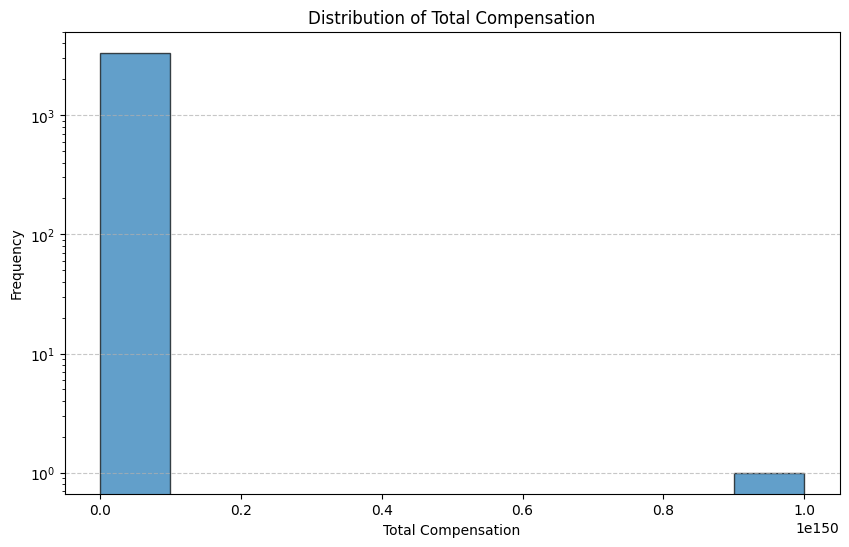

In [9]:
#1.1 Histogram of CompTotal (Total Compensation)
QUERY = """
SELECT CompTotal 
FROM main
GROUP BY CompTotal
ORDER BY CompTotal
"""
df = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
plt.hist(df["CompTotal"], bins=10, edgecolor="black", alpha=0.7)
plt.xlabel("Total Compensation")
plt.ylabel("Frequency")
plt.title("Distribution of Total Compensation")
plt.yscale("log")  
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


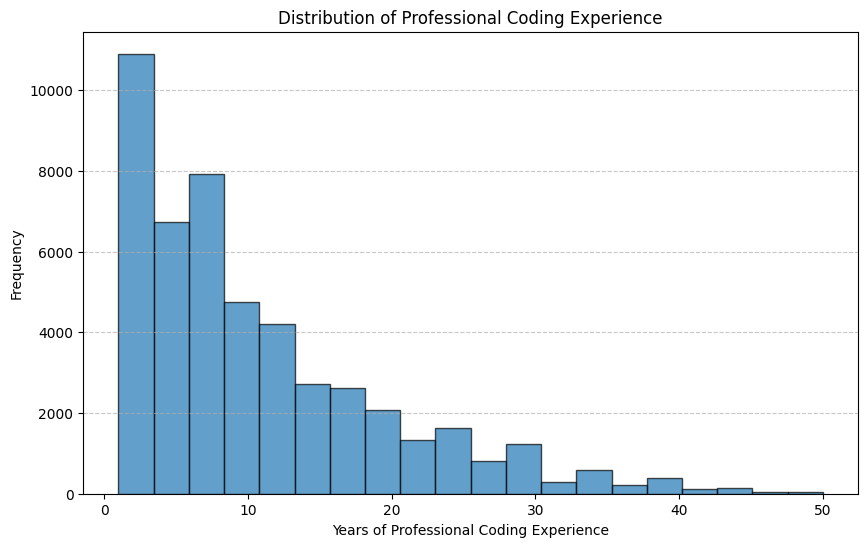

In [10]:
#1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)

QUERY = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)

df["YearsCodePro"] = pd.to_numeric(df["YearsCodePro"], errors='coerce')

plt.figure(figsize=(10, 6))
plt.hist(df["YearsCodePro"], bins=20, edgecolor="black", alpha=0.7)
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Frequency")
plt.title("Distribution of Professional Coding Experience")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [24]:
#2.1 Histogram Comparison of CompTotal by Age Group
QUERY = "SELECT CompTotal, Age FROM main WHERE YearsCodePro IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df.dropna(subset=['CompTotal', 'Age'], inplace=True)
df = df[df['CompTotal'] < 1_000_000]
mapping_age_group = { "Under 18 years old": 18, "18-24 years old": (18+24)/2, "25-34 years old": (25+34)/2, "35-44 years old": (35+44)/2, "45-54 years old": (45+54)/2, "55-64 years old": (55+64)/2, "65 years or older": 65 }
df['AgeMapped'] = df['Age'].map(mapping_age_group)
age_groups = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
age_group_avg_compensation = df.groupby('AgeMapped')['CompTotal'].mean()
plt.figure(figsize=(10, 6))
for age_group in mapping_age_group:
    subset = df[df["AgeMapped"] == age_group]["CompTotal"]
    if subset.empty:
        print(f"No data for age group {age_group}, skipping...")
        continue
    plt.hist(subset, bins=30, alpha=0.5, label=age_group)
   
plt.show()

No data for age group Under 18 years old, skipping...
No data for age group 18-24 years old, skipping...
No data for age group 25-34 years old, skipping...
No data for age group 35-44 years old, skipping...
No data for age group 45-54 years old, skipping...
No data for age group 55-64 years old, skipping...
No data for age group 65 years or older, skipping...


<Figure size 1000x600 with 0 Axes>

In [25]:
#2.1 Histogram Comparison of CompTotal by Age Group
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT Age, CompTotal FROM main"
df = pd.read_sql_query(query, conn)

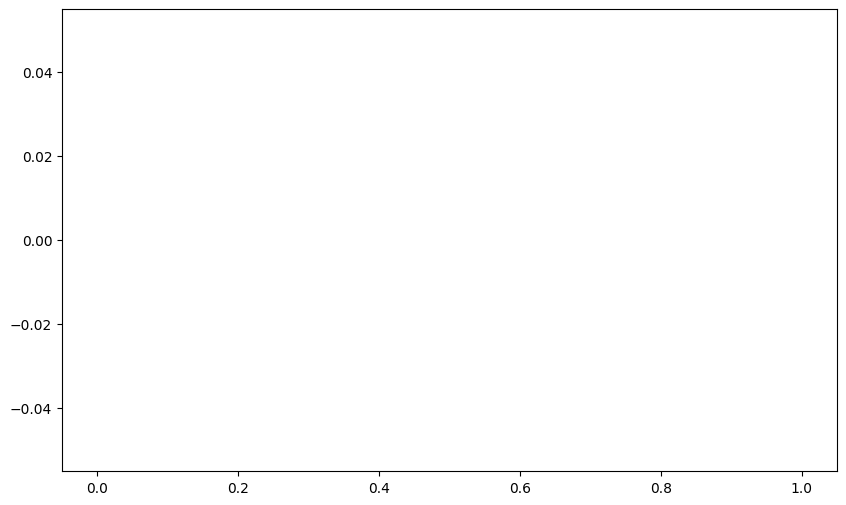

In [28]:
QUERY = "SELECT CompTotal, Age FROM main WHERE YearsCodePro IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)
df['CompTotal'] = pd.to_numeric(df['CompTotal'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df[df['CompTotal'] < 1_000_000]
mapping_age_group = { "Under 18 years old": 18, "18-24 years old": (18+24)/2, "25-34 years old": (25+34)/2, "35-44 years old": (35+44)/2, "45-54 years old": (45+54)/2, "55-64 years old": (55+64)/2, "65 years or older": 65 }
df['AgeMapped'] = df['Age'].map(mapping_age_group)
age_groups = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
age_group_avg_compensation = df.groupby('AgeMapped')['CompTotal'].mean()
df = df.reset_index(drop=True)
plt.figure(figsize=(10, 6))

plt.hist(subset, bins=30, alpha=0.5, label=age_group)
   
plt.show()

In [27]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [29]:
#2.2 Histogram of TimeSearching for Different Age Groups
QUERY = "SELECT TimeSearching, Age"
df = pd.read_sql_query(QUERY, conn)
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df = df[df['CompTotal'] < 1_000_000]
mapping_age_group = { "Under 18 years old": 18, "18-24 years old": (18+24)/2, "25-34 years old": (25+34)/2, "35-44 years old": (35+44)/2, "45-54 years old": (45+54)/2, "55-64 years old": (55+64)/2, "65 years or older": 65 }
df['AgeMapped'] = df['Age'].map(mapping_age_group)
age_groups = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']


plt.figure(figsize=(10, 6))

plt.hist(subset, bins=30, alpha=0.5, label=age_group)
   
plt.show()

DatabaseError: Execution failed on sql 'SELECT TimeSearching, Age': no such column: TimeSearching

In [30]:
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT Age, TimeSearching FROM main"
df = pd.read_sql_query(query, conn)

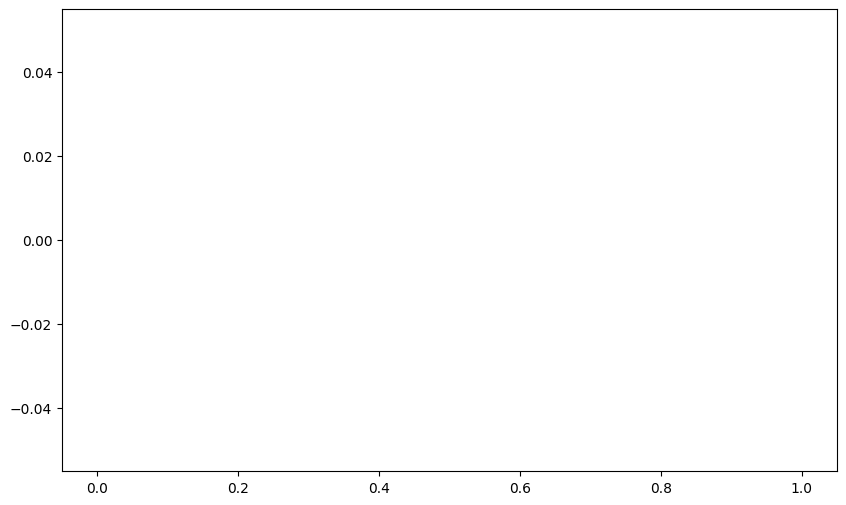

In [36]:
#2.2 Histogram of TimeSearching for Different Age Groups
QUERY = "SELECT Age, TimeSearching FROM main WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)
df['TimeSearching'] = pd.to_numeric(df['TimeSearching'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

mapping_age_group = { "Under 18 years old": 18, "18-24 years old": (18+24)/2, "25-34 years old": (25+34)/2, "35-44 years old": (35+44)/2, "45-54 years old": (45+54)/2, "55-64 years old": (55+64)/2, "65 years or older": 65 }
df['AgeMapped'] = df['Age'].map(mapping_age_group)
age_groups = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']


plt.figure(figsize=(10, 6))

plt.hist(subset, bins=30, alpha=0.5, label=age_group)
   
plt.show()

In [33]:
QUERY = """
SELECT TimeSearching
FROM main 
GROUP BY TimeSearching 
ORDER BY TimeSearching
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df)

                      Age TimeSearching
0      Under 18 years old          None
1         35-44 years old          None
2         45-54 years old          None
3         18-24 years old          None
4         18-24 years old          None
...                   ...           ...
65432     18-24 years old          None
65433     25-34 years old          None
65434     25-34 years old          None
65435     18-24 years old          None
65436     18-24 years old          None

[65437 rows x 2 columns]


In [37]:
print(df.columns)

Index(['Age', 'TimeSearching', 'AgeMapped'], dtype='object')


In [38]:
df["TimeSearching"] = pd.to_numeric(df["TimeSearching"], errors="coerce")
print(df["TimeSearching"].isna().sum()) 

28911


In [39]:
print(df.columns) 
print(df.head()) 
print(df["TimeSearching"].dtype)  
print(df["TimeSearching"].unique())  

Index(['Age', 'TimeSearching', 'AgeMapped'], dtype='object')
   Age  TimeSearching  AgeMapped
0  NaN            NaN        NaN
1  NaN            NaN        NaN
2  NaN            NaN        NaN
3  NaN            NaN        NaN
4  NaN            NaN        NaN
float64
[nan]


In [40]:
df = df.reset_index(drop=True)

In [45]:
conn = sqlite3.connect('survey-data.sqlite')
query = "SELECT Age, TimeSearching FROM main"
df = pd.read_sql_query(query, conn)

In [47]:
df = df.reset_index(drop=True)

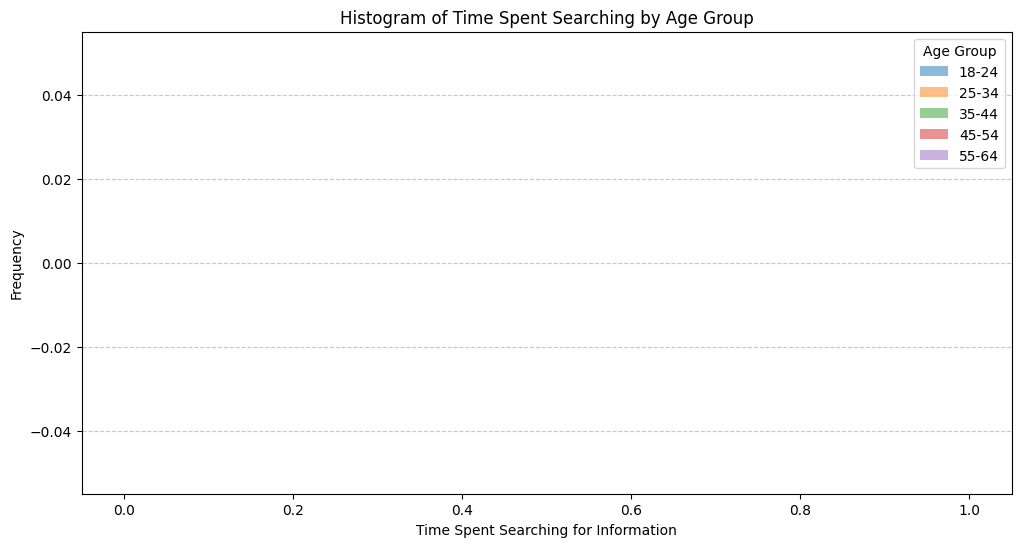

In [48]:
#2.2 Histogram of TimeSearching for Different Age Groups
query = "SELECT Age, TimeSearching FROM main WHERE Age IS NOT NULL AND TimeSearching IS NOT NULL"
df = pd.read_sql_query(query, conn)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["TimeSearching"] = pd.to_numeric(df["TimeSearching"], errors="coerce")

bins = [18, 25, 35, 45, 55, 65]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
plt.figure(figsize=(12, 6))
for age_group in labels:
    subset = df[df["AgeGroup"] == age_group]["TimeSearching"]
    plt.hist(subset, bins=30, alpha=0.5, label=age_group)
plt.xlabel("Time Spent Searching for Information")
plt.ylabel("Frequency")
plt.title("Histogram of Time Spent Searching by Age Group")
plt.legend(title="Age Group")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



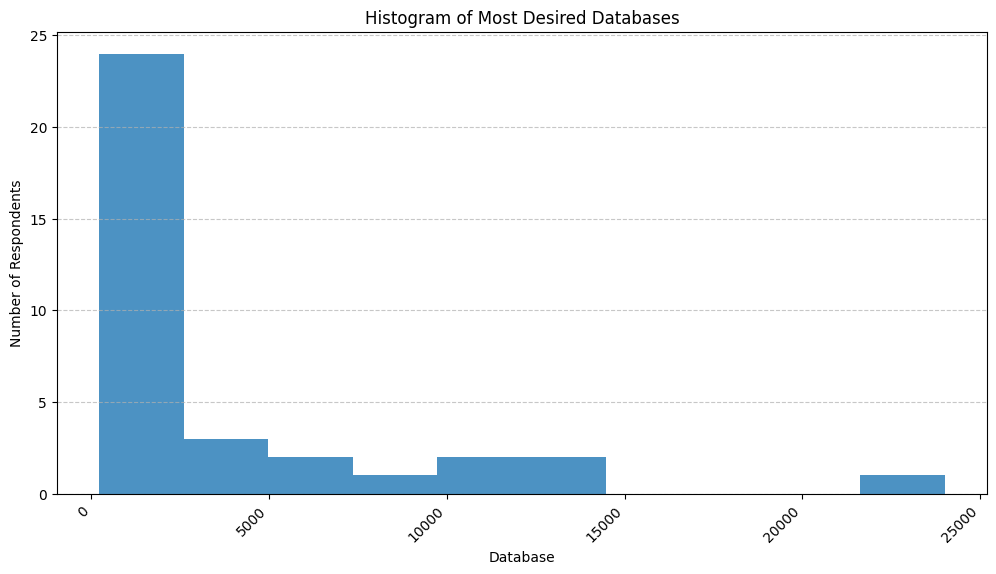

In [49]:
#Histogram of Most Desired Databases (DatabaseWantToWorkWith)
QUERY = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df = pd.read_sql_query(QUERY, conn)
db_list = df["DatabaseWantToWorkWith"].str.split(";").explode()

db_counts = db_list.value_counts()


plt.figure(figsize=(12, 6))
db_counts.plot(kind="hist", color="#1f77b4", alpha=0.8)
plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.title("Histogram of Most Desired Databases")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

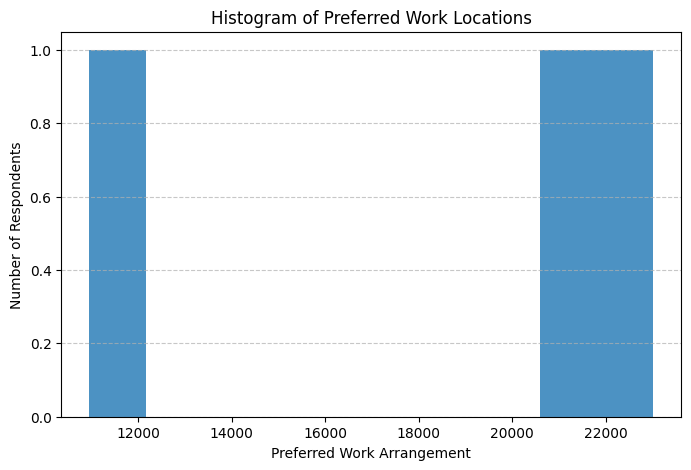

In [57]:
#3.2 Histogram of Preferred Work Locations (RemoteWork)
query = "SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL"
df = pd.read_sql_query(query, conn)
category_mapping = {
    "Fully remote": "Remote",
    "Remote": "Remote",
    "Hybrid": "Hybrid (some remote, some in-person)",
    "Partially remote": "Hybrid (some remote, some in-person)",
    "In-office": "In-person",
    "On-site": "In-person"
}

work_pref_counts = df["RemoteWork"].value_counts()
df["RemoteWork"] = df["RemoteWork"].replace(category_mapping)
category_order = ["Remote", "Hybrid (some remote, some in-person)", "In-person"]
work_pref_counts = work_pref_counts.reindex(category_order, fill_value=0)
plt.figure(figsize=(8, 5))
work_pref_counts.plot(kind="hist", color=["#1f77b4", "#ff7f0e", "#2ca02c"], alpha=0.8)
plt.xlabel("Preferred Work Arrangement")
plt.ylabel("Number of Respondents")
plt.title("Histogram of Preferred Work Locations")
plt.xticks(rotation=0)  
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

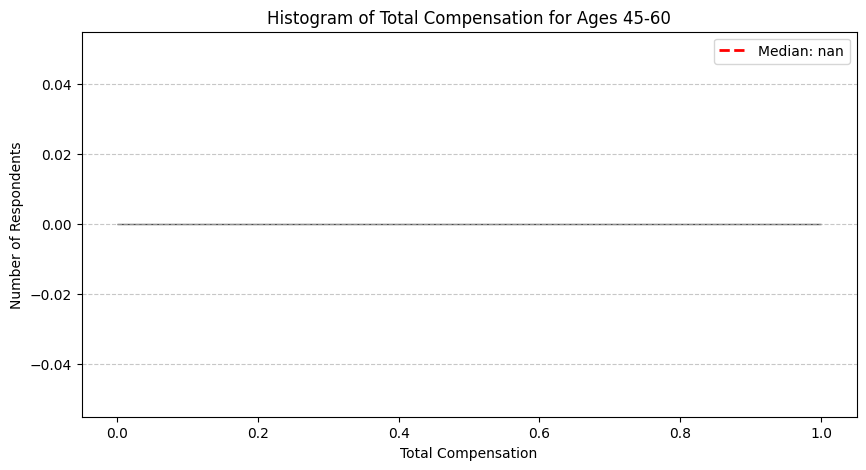

In [58]:
#4.1 Histogram of Median CompTotal for Ages 45 to 60
query = "SELECT Age, CompTotal FROM main WHERE Age BETWEEN 45 AND 60 AND CompTotal IS NOT NULL"

df = pd.read_sql_query(query, conn)

df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")

df.dropna(subset=["Age", "CompTotal"], inplace=True)

median_comp = df["CompTotal"].median()

plt.figure(figsize=(10, 5))
plt.hist(df["CompTotal"], bins=30, color="#1f77b4", alpha=0.7, edgecolor="black")

plt.axvline(median_comp, color="red", linestyle="dashed", linewidth=2, label=f"Median: {median_comp:,.0f}")

plt.xlabel("Total Compensation")
plt.ylabel("Number of Respondents")
plt.title("Histogram of Total Compensation for Ages 45-60")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
#4.2 Histogram of Job Satisfaction (JobSat) by YearsCodePro
query = "SELECT JobSat, YearsCodePro FROM main WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL"
df = pd.read_sql_query(query, conn)
